In [1]:
import os
import numpy as np 
import pandas as pd 
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
%matplotlib inline

import h5py
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras import regularizers, optimizers
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from IPython.display import SVG
from keras.utils import plot_model

for dirname, _, filenames in os.walk('./archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

2024-03-14 16:23:33.105372: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-14 16:23:34.453904: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


./archive/train_happy.h5
./archive/test_happy.h5


In [22]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3]:
''' train and test path '''
test_path = h5py.File("./archive/test_happy.h5")
train_path = h5py.File("./archive/train_happy.h5")

In [4]:
''' X_train, X_test, y_train, y_test '''

X_train = np.array(train_path['train_set_x'])
y_train = np.array(train_path['train_set_y'])
X_test = np.array(test_path['test_set_x'])
y_test = np.array(test_path['test_set_y'])

''' Checking shape of X_train and X_test'''
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_train.shape)

(600, 64, 64, 3)
(600,)
(150, 64, 64, 3)
(600,)


In [5]:
''' normalizing images '''
X_train = X_train / 255

X_test = X_test/255

In [6]:
''' reshapig '''
y_train = y_train.reshape((600,1))
y_test = y_test.reshape((150,1))

''' checking shape of y_train '''
y_train.shape

(600, 1)

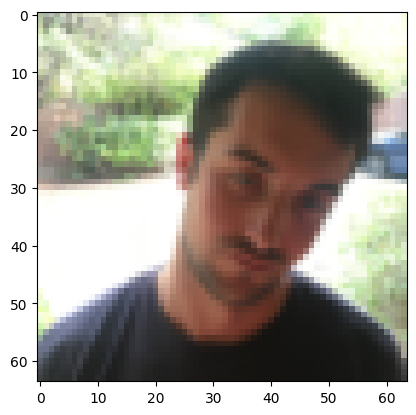

In [7]:
''' plotting an image '''
plt.imshow(X_train[0])

In [15]:
""" Model """

def cnn_model(input_shape):
  
    ''' input layers'''
    inp = Input(input_shape)
    
    ''' Zero Padding '''
    out = ZeroPadding2D((3, 3))(inp)
    
    ''' Convolutional Layer '''
    out = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(out)
    
    ''' Bathc Norm '''
    out = BatchNormalization(axis = 3, name = 'bn0')(out)
    
    ''' Activation '''
    out = Activation('relu')(out)

    ''' MaxPooling  '''
    out = MaxPooling2D((2, 2), name='max_pool')(out)

    ''' Flatterning the output '''
    out = Flatten()(out)
    
    ''' Classification Layer '''
    out= Dense(1, activation='sigmoid', name='fc')(out)

    ''' Model '''
    model = Model(inputs=inp, outputs=out, name='HappyModel')

    return model

In [16]:
model = cnn_model((64, 64, 3))

''' lets see how model looks like '''
model.summary()

2024-03-14 16:31:57.731054: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-14 16:31:57.919477: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "HappyModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_2                │ (None, 70, 70, 3)      │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv0 (Conv2D)                  │ (None, 64, 64, 32)     │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn0 (BatchNormalization)        │ (None, 64, 64, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool (MaxPooling2D)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc (Dense)                      │ (None, 1)              │        32,769 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,633 (147.00 KB)

 Trainable params: 37,569 (146.75 KB)

 Non-trainable params: 64 (256.00 B)

In [17]:
''' compile the model '''
model.compile(loss='binary_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [18]:
''' training '''
model.fit(X_train, y_train, batch_size=16, epochs=50, validation_data=(X_test, y_test), shuffle=False)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.6393 - loss: 1.4642 - val_accuracy: 0.5867 - val_loss: 0.6201
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9303 - loss: 0.1814 - val_accuracy: 0.7733 - val_loss: 0.4568
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9331 - loss: 0.1928 - val_accuracy: 0.7533 - val_loss: 0.4538
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9244 - loss: 0.2188 - val_accuracy: 0.5933 - val_loss: 0.9001
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9270 - loss: 0.2161 - val_accuracy: 0.7400 - val_loss: 0.5528
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9146 - loss: 0.2702 - val_accuracy: 0.9133 - val_loss: 0.2113
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9838 - loss: 0.0942 - val_accuracy: 0.9267 - val_loss: 0.2212
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9763 - loss: 0.0978 - val_accuracy: 0.9400 - v

In [23]:
''' evaluating the model'''
pred = model.evaluate(X_test,y_test)

print ("Loss = " + str(pred[0]))
print ("Test Accuracy = " + str(pred[1]))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8197 - loss: 0.9319
Loss = 0.9106192588806152
Test Accuracy = 0.8133333325386047
